In [63]:
import tensorflow as tf
import keras
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train[:1, :])

[[  1.23247   0.        8.14      0.        0.538     6.142    91.7
    3.9769    4.      307.       21.      396.9      18.72   ]]


In [64]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
print(X_train.shape)
print(X_train.dtype)

(404, 13)
float64


In [65]:
def splitTrainSimply(train_data, valid_rate=0.25):
    data_len = train_data.shape[0]
    border = int(data_len * valid_rate)
    return train_data[border:], train_data[:border]

X_train, X_valid = splitTrainSimply(X_train)
y_train, y_valid = splitTrainSimply(y_train)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(303, 13)
(101, 13)
(303,)
(101,)


In [66]:
X_a_train, X_b_train = X_train[:, 11:], X_train
X_a_valid, X_b_valid = X_valid[:, 11:], X_valid
X_a_test, X_b_test = X_test[:, 11:], X_test

In [81]:
from keras import layers
from keras import activations
input_a_nodes = layers.Input(shape=2, name="wide_input")
input_b_nodes = layers.Input(shape=13, name="deep_input")
hidden1_nodes = layers.Dense(30, activation=activations.relu)(input_b_nodes)
hidden2_nodes = layers.Dense(30, activation=activations.relu)(hidden1_nodes)
concat_nodes = layers.Concatenate()([input_a_nodes, hidden2_nodes])
output_nodes = layers.Dense(1, name="main_output")(concat_nodes)
aux_output_nodes= layers.Dense(1, name="aux_output")(hidden2_nodes)

model = keras.Model(
    inputs=[input_a_nodes, input_b_nodes], outputs=[output_nodes, aux_output_nodes]
)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 13)]         0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           420         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 2)]          0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                            

In [82]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.SGD(), loss=losses.MeanSquaredError(), loss_weights=[0.9, 0.1])

In [85]:
histroy = model.fit(
    x=(X_a_train, X_b_train),
    y=(y_train, y_train),
    epochs=30,
    validation_data=((X_a_valid, X_b_valid), (y_valid, y_valid))
)

Epoch 1/30
10/10 [==============================] - 0s 10ms/step - loss: 28.2437 - main_output_loss: 13.5870 - aux_output_loss: 14.6568 - val_loss: 18.4201 - val_main_output_loss: 8.2335 - val_aux_output_loss: 10.1866
Epoch 2/30
10/10 [==============================] - 0s 6ms/step - loss: 19.7863 - main_output_loss: 10.0424 - aux_output_loss: 9.7439 - val_loss: 20.3027 - val_main_output_loss: 8.9406 - val_aux_output_loss: 11.3621
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: 20.5519 - main_output_loss: 10.1149 - aux_output_loss: 10.4369 - val_loss: 21.7477 - val_main_output_loss: 9.7484 - val_aux_output_loss: 11.9993
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 24.8931 - main_output_loss: 12.1246 - aux_output_loss: 12.7685 - val_loss: 19.0239 - val_main_output_loss: 8.7783 - val_aux_output_loss: 10.2456
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 33.7936 - main_output_loss: 15.9089 - aux_output_loss: 17.88

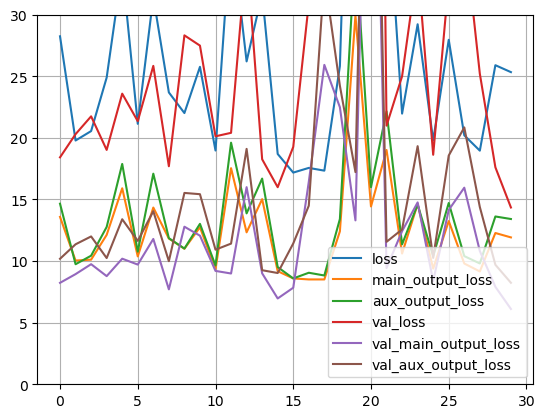

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(histroy.history).plot()
plt.ylim((0, 30))
plt.grid(True)

In [79]:
model.evaluate(x=(X_a_test, X_b_test), y=y_test)

4/4 [==============================] - 0s 2ms/step - loss: 25.5239


25.523906707763672